# Popularity of Hearthstone Cards

Sebastian Rouse

December 7, 2018

Advanced Topics in Computer Science and Making

Isidore Newman School 

# Abstract

This data set is a colection of over 346,000 decks used in the card game Hearthstone. The most popular card in the dataset, has continued increase in poularity over its time of being in the game.

# Introduction

Hearthstone is a card game where two players, each having a deck of thirty cards, face off. The decks consist of minons, who have attack and health stats as well as various abilites that can be utilized if certain conditions are met, and spells, which can have many effects. Each card has a certain mana cost, you start out with one mana and every turn you have one more until you get ten mana. 

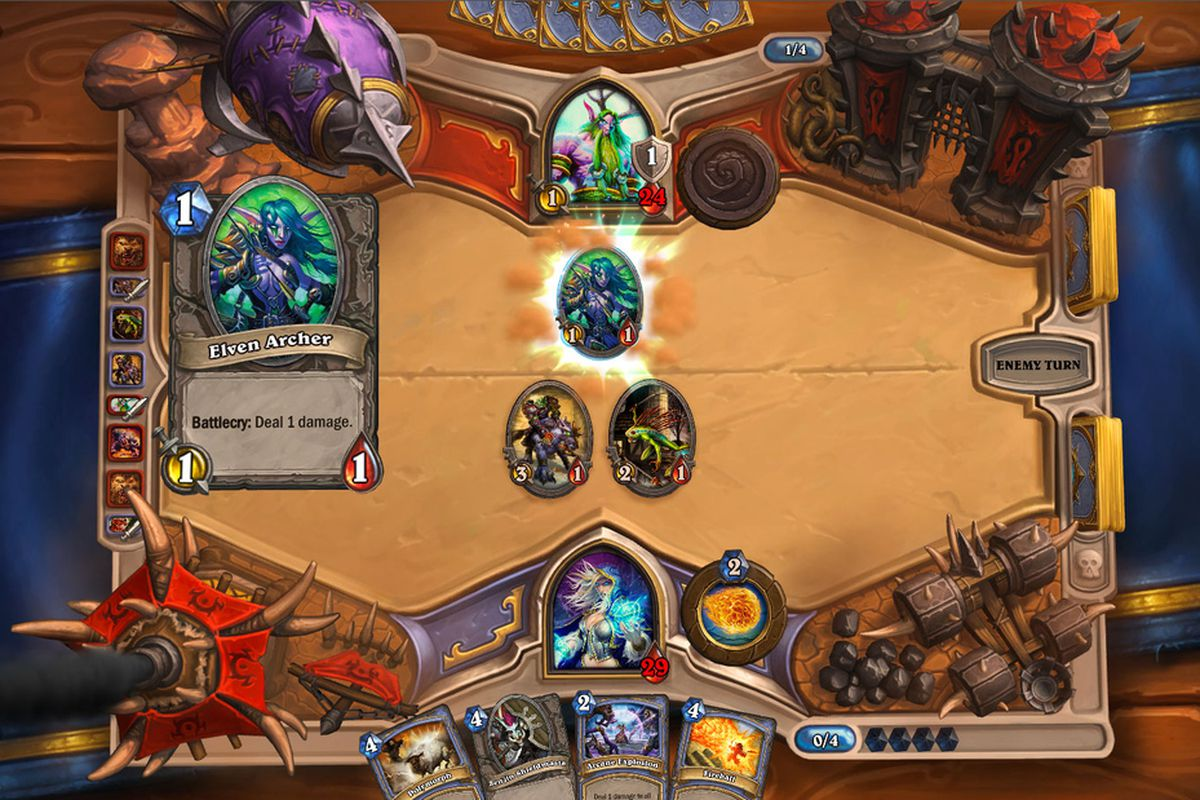

What is the most popular card in Hearthstone and how has its popularity changed over time? 

In hearthstone a large part of winning strategies is predicting what cards your opponent will be using, knowing the most used card and how relevent it is in the current metagame can allow for you to prepare a strategy that will not be hindered by the opponent using this card. The data set is good for answering this question because it allows for one to check the most popular card and its popularity over time, showing if the card is still relevent in the metagame. Every row of this data set is a deck and it contains every card in the deck in the for of an ID number, the date it was made, and the type of deck(ranked, casual, single player). These decks are from casual and competitive players who wanted to share their decks. 

# Methods

I use a function called groupby in order to group the dataset by the desired perameters such as date. A massive part of the code is for loops and if statements in order to sort through the data and reorganize it into new dataframes that are easier to work with for the purpose of tracking the most popular card's relevency in the metagame. The visualization is a scatter plot. 

# Results

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
hearthstone = pd.read_csv('data.csv')

Organizing all the cards, and the dates they were put into a deck, into a two-column dataframe in order to make opperating and extracting conclusions from the cards and their dates easier. This function also prints the mode of all the cards so that I can check for its popularity over time later in the code.

In [3]:
def allCards(df): 
    everyCard = []
    everyDate = []
    for i in range (11, 40):
        for p in range (len(df['date'])):
            if (p%2 == 0):
                everyCard.append(df[df.columns[i]][p])
                everyDate.append(df['date'][p])
    cardsAndDates = pd.DataFrame({'everyCard': everyCard, 'everyDate': everyDate})
    cards = pd.DataFrame({'cards': everyCard})
    print(cards.mode())
    return(cardsAndDates)

allCards = allCards(hearthstone)

   cards
0    825


Converting the dates to datetime and adding a column that represents the month and year of the dates, allowing for the dataset to be grouped by month and year allowing for the dataset to be more easily processed.

In [6]:
allCards['everyDate'] = pd.to_datetime(allCards.everyDate)
allCards['month_year'] = allCards['everyDate'].apply(lambda x: "%d/%d" % (x.month, x.year))

These following lines are used to find the number of decks that were made during every month and year so that the frequency with which the most popular card can be converted to a percentage. 

In [57]:
hearthstone['date'] = pd.to_datetime(hearthstone.date)
hearthstone['month_year'] = hearthstone['date'].apply(lambda x: "%d/%d" % (x.month, x.year))

In [97]:
x = hearthstone.groupby(['month_year']).size().to_frame(name = 'count').reset_index()

Grouping the data set by the month and year as well as the cards that occur in that month and year. This is then used to evaluate the frequency with which each card occurs in each month and year. Groupby groups the data frame by the given criteria, for example in this code allCards is grouped by month_year and Card so the resultant dataframe will have all the cards that were used on the same month and year in the same section.

In [7]:
allCards = allCards.groupby(['month_year', 'everyCard']).size().to_frame(name = 'count').reset_index()

This function gets the frequency with which the most popular card in the data set occurs in every month and year. The number passed to the function is the card ID for the most popular card in the dataset. In this case it is lord Godfrey(depicted below), this is represented by popularityHigh.

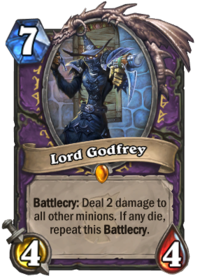


In [62]:
def getOccurance(cardID):
    arrMonth = []
    arrCount = []
    for i in range(len(allCards['everyCard'])):
        if allCards['everyCard'][i] == cardID:
            arrMonth.append(allCards['month_year'][i])
            arrCount.append(allCards['count'][i])
    arrMonth = pd.to_datetime(arrMonth)
    y = pd.DataFrame({'month_year': arrMonth, 'frequency': arrCount})
    return(y)

popularity = getOccurance(825)

In [81]:
popularity.head()

,month_year,frequency
0,2014-01-01,477
1,2015-01-01,1034
2,2016-01-01,1758
3,2017-01-01,2980
4,2013-10-01,773


This adds a new column to the data frame that represents the percentage of decks Lord Godfrey was used in for every month and year.

In [90]:
relPop = []
for i in range(len(popularity['frequency'])):
    relPop.append((popularity['frequency'][i])/(x['count'][i])*100)
popularity['relativePopularity'] = relPop

This data set's dates are are timestamps, however in order to plot the popularity of lord godfrey(card ID 825) and Starving Buzzard(card ID 237) on the scatterplot, the dates must be converted to integers.

In [91]:
scatter = popularity.copy()
def numberDate(df):
    x = 0
    numberDate = []
    for i in range(len(df['month_year'])):
        x = ((df['month_year'][i].year*365) + (df['month_year'][i].month*30))
        numberDate.append(float(x/365))
    return(numberDate)

scatter['numberDate'] = numberDate(scatter)

In [107]:
scatter.dtypes

month_year            datetime64[ns]
frequency                      int64
relativePopularity           float64
numberDate                   float64
dtype: object

Ploting the popularity of Lord Godfrey(card 825) over time, in terms of times it appears in a month. 

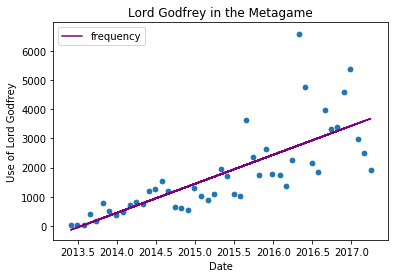

In [111]:
fit = np.polyfit(scatter.numberDate, scatter.frequency, 1)
fit_fn = np.poly1d(fit)

r_x, r_y = zip(*((i, i*fit[0] + fit[1]) for i in scatter.numberDate))

fit_plot = pd.DataFrame({
    'numberDate' : r_x,
    'frequency' : r_y
})

fig, axes = plt.subplots()
 
scatter.plot(x='numberDate', y='frequency', kind="scatter", ax = axes, title='Lord Godfrey in the Metagame')
fit_plot.plot(x='numberDate', y='frequency', kind='line', ax = axes, color = 'purple')

ax = scatter.plot(x='numberDate', y='frequency', kind="scatter", ax = axes, title='Lord Godfrey in the Metagame')

ax.set_xlabel("Date")
ax.set_ylabel("Use of Lord Godfrey")

plt.show()

%matplotlib inline

This graph plots what percent of decks Lord Godfrey was in over time. It is adjusted so that the data is not skewed by a certain month having more decks.

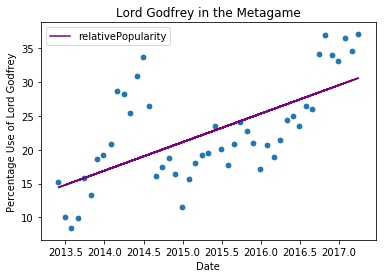

In [112]:
fit = np.polyfit(scatter.numberDate, scatter.relativePopularity, 1)
fit_fn = np.poly1d(fit)

r_x, r_y = zip(*((i, i*fit[0] + fit[1]) for i in scatter.numberDate))

fit_plot = pd.DataFrame({
    'numberDate' : r_x,
    'relativePopularity' : r_y
})

fig, axes = plt.subplots()
 
scatter.plot(x='numberDate', y='relativePopularity', kind="scatter", ax = axes, title='Lord Godfrey in the Metagame')
fit_plot.plot(x='numberDate', y='relativePopularity', kind='line', ax = axes, color = 'purple')

ax = scatter.plot(x='numberDate', y='relativePopularity', kind="scatter", ax = axes, title='Lord Godfrey in the Metagame')

ax.set_xlabel("Date")
ax.set_ylabel("Percentage Use of Lord Godfrey")

plt.show()

%matplotlib inline

Slope, r squared value, and p value for scaled popularity:

In [120]:
print(linregress(scatter['numberDate'], scatter['relativePopularity']))
print("r squared value: " + str(linregress(scatter['numberDate'], scatter['relativePopularity']).rvalue**2))

LinregressResult(slope=4.214879216355231, intercept=-8471.849755787294, rvalue=0.6404629748197752, pvalue=1.244431535380051e-06, stderr=0.753424737459396)
r squared value: 0.410192822114996


Slope, r squared value, and p value for not scaled popularity:

In [121]:
print(linregress(scatter['numberDate'], scatter['frequency']))
print("r squared value: " + str(linregress(scatter['numberDate'], scatter['frequency']).rvalue**2))

LinregressResult(slope=993.5012062443856, intercept=-2000459.4101360901, rvalue=0.7675494919117595, pvalue=3.0894477414159357e-10, stderr=123.6820841047662)
r squared value: 0.5891322225340001


# Discussion 

Lord Godfrey's popularity has only increased over time and so has the need to be prepared to counter the card. I suspect that this will lead to the card receiving debuffs as the game developers tend to attempt to rebalance the game with constant updates, high popularity amongst the players often warrents attention from the devs. Another possible explanation could be that players will stop playing strategies that are easily countered by lord Godfrey. In terms of aproach, knowing what I know now, I would have liked to stay more on topic and focus more on the original question rather than trying to answer multiple interesting questions at once. In an ideal data set I would like to have the ratio of wins to losses of each of the decks so that I could also try to find out which cards warrent the highest winrate. 

# Refrences

Romain Vincent, “History of Hearthstone,” https://www.kaggle.com/romainvincent/history-of-hearthstone.

Hearthstone API, http://hearthstoneapi.com/cards#